<a href="https://colab.research.google.com/github/tasnimislamraisa/Python_Learning/blob/main/MLP_for_image_classification_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

**Loading the dataset**

In [112]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [113]:
# image size 28*28
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [114]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [115]:
# check how many levels
unique,count = np.unique(y_train,return_counts=True)
dict(zip(unique,count))

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

**Dataset samples**

In [116]:
index=[10,16,1888,2000,20005]
images = x_train[index]
labels = y_train[index]

**Plottinf image sample**

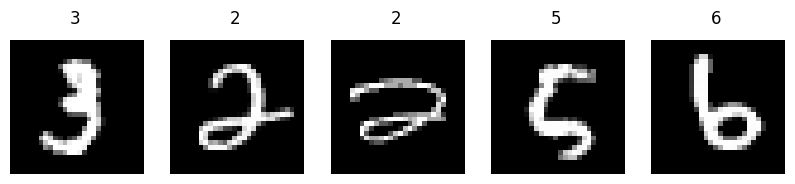

In [117]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i],cmap='gray')
   # plt.title(labels[i],fontsize=12)
    plt.text(12,-4,labels[i],fontsize=12)
    plt.axis('off')

In [118]:
'''input_size=x_train.shape[1]*x_train.shape[1]
print(input_size)
x_train= np.reshape(x_train,[-1,input_size])
x_train.shape
input_size=x_test.shape[1]*x_test.shape[1]
print(input_size)
x_test= np.reshape(x_test,[-1,input_size])
x_test.shape'''

'input_size=x_train.shape[1]*x_train.shape[1]\nprint(input_size)\nx_train= np.reshape(x_train,[-1,input_size])\nx_train.shape\ninput_size=x_test.shape[1]*x_test.shape[1]\nprint(input_size)\nx_test= np.reshape(x_test,[-1,input_size])\nx_test.shape'

In [119]:
x_train=x_train/255.0
x_test=x_test/255.0

In [126]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

# **one hot encoding**

In [ ]:
# one hot encoding
# if we use catagorical entropy loss function we have to use one hot encoding
# but as i used "sparse_categorical_crossentropy" i didn't apply one hot encoding
#y_train=to_categorical(y_train)
#y_test=to_categorical(y_test)
#y_train[:2]


In [166]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
# if we have more than one output layer then we use softmax activation function
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [167]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [168]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [169]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [170]:
history = model.fit(x_train,y_train,epochs=100,validation_split=0.2,callbacks=callback)


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7796 - loss: 0.6922 - val_accuracy: 0.9536 - val_loss: 0.1561
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9412 - loss: 0.1991 - val_accuracy: 0.9653 - val_loss: 0.1198
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9539 - loss: 0.1527 - val_accuracy: 0.9690 - val_loss: 0.1010
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9641 - loss: 0.1180 - val_accuracy: 0.9712 - val_loss: 0.1032
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9688 - loss: 0.1040 - val_accuracy: 0.9731 - val_loss: 0.0955
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9699 - loss: 0.0981 - val_accuracy: 0.9741 - val_loss: 0.0943
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9746 - loss: 0.0865 - val_accuracy: 0.9770 - val_loss: 0.0848
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9746 - loss: 

In [171]:
y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [172]:
y_pred = y_prob.argmax(axis=1)

In [173]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9798

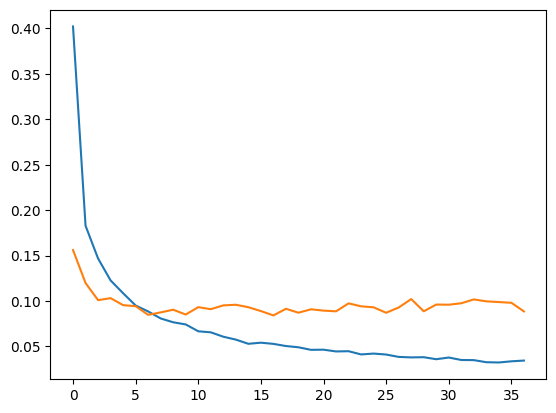

In [184]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


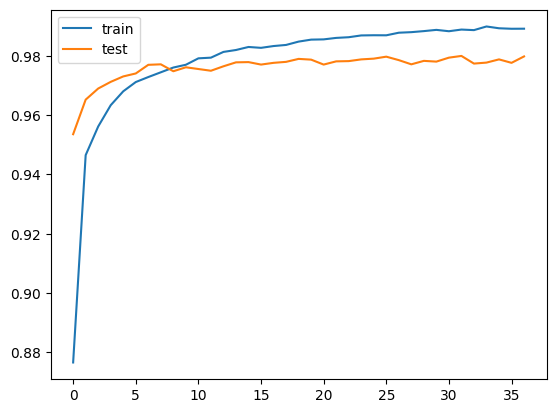

In [182]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','test'])

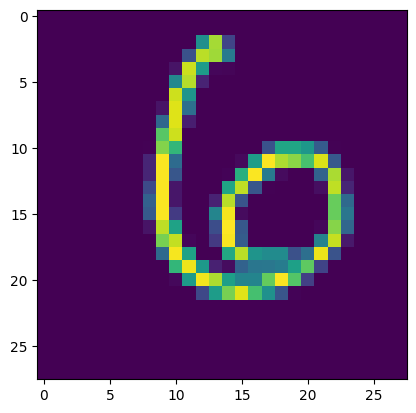

In [178]:
plt.imshow(x_test[100])

In [179]:
model.predict(x_test[100].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([6])